'lc' Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's add a lightcurve dataset to the Bundle (see also the [lc API docs](../api/phoebe.parameters.dataset.lc.md)).  Some parameters are only visible based on the values of other parameters, so we'll pass `check_visible=False` (see the [filter API docs](../api/phoebe.parameters.ParameterSet.filter.md) for more details).  These visibility rules will be explained below.

In [3]:
b.add_dataset('lc')
print(b.get_dataset(kind='lc', check_visible=False))

ParameterSet: 24 parameters
              times@lc01@dataset: [] d
             fluxes@lc01@dataset: [] W / m2
           passband@lc01@dataset: Johnson:V
   intens_weighting@lc01@dataset: energy
      compute_times@lc01@dataset: [] d
*    compute_phases@lc01@dataset: []
             sigmas@lc01@dataset: [] W / m2
         pblum_mode@lc01@dataset: provided
       pblum_ref@lc01@lc@dataset: 
             pbflux@lc01@dataset: 1.0 W / m2
            l3_mode@lc01@dataset: flux
                 l3@lc01@dataset: 0.0 W / m2
            l3_frac@lc01@dataset: 0.0
            exptime@lc01@dataset: 0.0 s
    ld_func@primary@lc01@dataset: interp
  ld_func@secondary@lc01@dataset: interp
  ld_coeffs_source@primary@lc...: auto
  ld_coeffs_source@secondary@...: auto
  ld_coeffs@primary@lc01@dataset: [0.5 0.5]
  ld_coeffs@secondary@lc01@da...: [0.5 0.5]
  pblum_ref@primary@lc01@dataset: self
  pblum_ref@secondary@lc01@da...: primary
      pblum@primary@lc01@dataset: 12.5663706144 W
    pblum@secondary@

### times

In [4]:
print(b.get_parameter(qualifier='times'))

Parameter: times@lc01@dataset
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### fluxes

In [5]:
print(b.get_parameter(qualifier='fluxes'))

Parameter: fluxes@lc01@dataset
                       Qualifier: fluxes
                     Description: Observed flux
                           Value: [] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [57]:
print(b.get_parameter(qualifier='sigmas'))

Parameter: sigmas@lc01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty on flux
                           Value: [] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



### compute_times / compute_phases

See the [Compute Times & Phases tutorial](compute_times_phases.ipynb).

In [58]:
print(b.get_parameter(qualifier='compute_times'))

Parameter: compute_times@lc01@dataset
                       Qualifier: compute_times
                     Description: Times to use during run_compute.  If empty, will use times parameter
                           Value: [] d
                  Constrained by: 
                      Constrains: compute_phases@lc01@dataset
                      Related to: period@binary@component, compute_phases@lc01@dataset



In [60]:
print(b.get_parameter(qualifier='compute_phases', context='dataset'))

Parameter: compute_phases@lc01@dataset
                       Qualifier: compute_phases
                     Description: Phases associated with compute_times.  Does not account for t0: for true phases, use b.to_phase or b.to_time
                           Value: []
                  Constrained by: compute_times@lc01@dataset, period@binary@component
                      Constrains: None
                      Related to: compute_times@lc01@dataset, period@binary@component



### ld_func

See the [Limb Darkening tutorial](./limb_darkening.ipynb)

In [7]:
print(b.get_parameter(qualifier='ld_func', component='primary'))

Parameter: ld_func@primary@lc01@dataset
                       Qualifier: ld_func
                     Description: Limb darkening model
                           Value: interp
                         Choices: interp, linear, logarithmic, quadratic, square_root, power



### ld_coeffs_source

`ld_coeffs_source` will only be available if `ld_func` is not 'interp', so let's set it to 'logarithmic'.  See the [limb darkening tutorial](./limb_darkening.ipynb) for more details.

In [8]:
b.set_value('ld_func', component='primary', value='logarithmic')

In [9]:
print(b.get_parameter(qualifier='ld_coeffs_source', component='primary'))

Parameter: ld_coeffs_source@primary@lc01@dataset
                       Qualifier: ld_coeffs_source
                     Description: Source for limb darkening coefficients ('none' to provide manually, 'auto' to interpolate from the applicable table according to the 'atm' parameter, or the name of a specific atmosphere table)
                           Value: auto
                         Choices: none, auto, ck2004
                 Only visible if: ld_func:!interp



### ld_coeffs

`ld_coeffs` will only be available if `ld_coeffs_source` is set to 'none'.  See the [limb darkening tutorial](./limb_darkening.ipynb) for more details.

In [10]:
b.set_value('ld_coeffs_source', component='primary', value='none')

In [11]:
print(b.get_parameter(qualifier='ld_coeffs', component='primary'))

Parameter: ld_coeffs@primary@lc01@dataset
                       Qualifier: ld_coeffs
                     Description: Limb darkening coefficients
                           Value: [0.5 0.5]
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: ld_func:!interp,ld_coeffs_source:none



### passband

In [12]:
print(b.get_parameter(qualifier='passband'))

Parameter: passband@lc01@dataset
                       Qualifier: passband
                     Description: Passband
                           Value: Johnson:V
                         Choices: STEREO:HI1A-noQE, Cousins:R, Stromgren:b, Brite:B, STEREO:HI1B-QE, Stromgren:v, Hipparcos:Hp, Stromgren:u, Brite:R, Stromgren:y, Johnson:B, Gaia:RP, STEREO:HI1B-noQE, Tycho:VT, Bolometric:900-40000, Johnson:R, Johnson:V, Johnson:U, Gaia:RVS, Kepler:mean, Gaia:G, Tycho:BT, Spitzer:5.8um, Gaia:BP, Spitzer:4.5um, KELT:R, LSST:i, LSST:g, TESS:default, Spitzer:3.6um, Cousins:I, LSST:z, STEREO:HI1A-QE, LSST:y, LSST:u, LSST:r, Spitzer:8.0um



### intens_weighting

See the [Intensity Weighting tutorial](intens_weighting)

In [13]:
print(b.get_parameter(qualifier='intens_weighting'))

Parameter: intens_weighting@lc01@dataset
                       Qualifier: intens_weighting
                     Description: Whether passband intensities are weighted by energy of photons
                           Value: energy
                         Choices: energy, photon



### pblum_mode

See the [Passband Luminosity tutorial](pblum)

In [14]:
print(b.get_parameter(qualifier='pblum_mode'))

Parameter: pblum_mode@lc01@dataset
                       Qualifier: pblum_mode
                     Description: Mode for scaling passband luminosities
                           Value: provided
                         Choices: provided, color coupled, total flux, scale to data, absolute



### pblum_ref

`pblum_ref` is only available if `pblum_mode` is set to 'provided' or 'color coupled' (although the choices are different for each case).  See the [passband luminosity tutorial](./pblum.ipynb) for more details.

In [15]:
b.set_value('pblum_mode', value='provided')

Note that when `pblum_mode` is 'provided', there are `pblum_ref` parameters per-component.

In [16]:
print(b.get_parameter(qualifier='pblum_ref', component='primary'))

Parameter: pblum_ref@primary@lc01@dataset
                       Qualifier: pblum_ref
                     Description: Whether to use this components pblum or to couple to that from another component in the system
                           Value: self
                         Choices: self, secondary
                 Only visible if: [component]pblum_mode:provided



In [17]:
b.set_value('pblum_mode', value='color coupled')

Note that when `pblum_mode` is 'color coupled', there is only a single `pblum_ref` parameter (per-dataset) and it is not attached to any component.

In [18]:
print(b.get_parameter(qualifier='pblum_ref'))

Parameter: pblum_ref@lc01@lc@dataset
                       Qualifier: pblum_ref
                     Description: Dataset with which to couple luminosities based on color
                           Value: 
                         Choices: 
                 Only visible if: pblum_mode:color coupled



### pblum

`pblum` is only available if `pblum_mode` is set to 'provided' and `pblum_ref` of the component is set to 'self'.  See the [passband luminosity tutorial](./pblum.ipynb) for more details.

In [19]:
b.set_value('pblum_mode', value='provided')

In [20]:
print(b.get_parameter(qualifier='pblum', component='primary'))

Parameter: pblum@primary@lc01@dataset
                       Qualifier: pblum
                     Description: Passband luminosity (defined at t0)
                           Value: 12.5663706144 W
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [component]pblum_mode:provided,pblum_ref:self



### pbflux

`pbflux` is only available if `pblum_mode` is set to 'total flux'.  See the [passband luminosity tutorial](./pblum.ipynb) for more details.

In [21]:
b.set_value('pblum_mode', value='total flux')

In [22]:
print(b.get_parameter('pbflux'))

Parameter: pbflux@lc01@dataset
                       Qualifier: pbflux
                     Description: Total inrinsic (excluding features and irradiation) passband flux (at t0, including l3 if pblum_mode='total flux')
                           Value: 1.0 W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: pblum_mode:system flux|total flux



### l3_mode

See the ["Third" Light tutorial](./l3.ipynb)

In [23]:
print(b.get_parameter(qualifier='l3_mode'))

Parameter: l3_mode@lc01@dataset
                       Qualifier: l3_mode
                     Description: Whether third light is given in units of flux or as a fraction of total light
                           Value: flux
                         Choices: flux, fraction of total light



### l3

`l3` is only avaible if `l3_mode` is set to 'flux'.  See the ["Third" Light tutorial](l3) for more details.

In [24]:
b.set_value('l3_mode', value='flux')

In [25]:
print(b.get_parameter(qualifier='l3'))

Parameter: l3@lc01@dataset
                       Qualifier: l3
                     Description: Third light in flux units
                           Value: 0.0 W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: l3_mode:flux



### l3_frac

`l3_frac` is only avaible if `l3_mode` is set to 'fraction of total light'.  See the ["Third" Light tutorial](l3) for more details.

In [26]:
b.set_value('l3_mode', value='fraction of total light')

In [27]:
print(b.get_parameter(qualifier='l3_frac'))

Parameter: l3_frac@lc01@dataset
                       Qualifier: l3_frac
                     Description: Third light as a fraction of total light
                           Value: 0.0
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: l3_mode:fraction of total light



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to computing fluxes and the LC dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [orb dataset](ORB.ipynb)
* parameters related to meshing, eclipse detection, and subdivision are explained in the section on the [mesh dataset](MESH.ipynb)

In [28]:
print(b.get_compute())

ParameterSet: 17 parameters
  dynamics_method@phoebe01@co...: keplerian
           ltte@phoebe01@compute: False
   irrad_method@phoebe01@compute: wilson
  boosting_method@phoebe01@co...: none
  eclipse_method@phoebe01@com...: native
  horizon_method@phoebe01@com...: boolean
  mesh_method@primary@phoebe0...: marching
  mesh_method@secondary@phoeb...: marching
  ntriangles@primary@phoebe01...: 1500
  ntriangles@secondary@phoebe...: 1500
  distortion_method@primary@p...: roche
  distortion_method@secondary...: roche
    atm@primary@phoebe01@compute: ck2004
  atm@secondary@phoebe01@compute: ck2004
        enabled@phoebe01@compute: True
      lc_method@phoebe01@compute: numerical
     fti_method@phoebe01@compute: none


### lc_method

In [29]:
print(b.get_parameter(qualifier='lc_method'))

Parameter: lc_method@phoebe01@compute
                       Qualifier: lc_method
                     Description: Method to use for computing LC fluxes
                           Value: numerical
                         Choices: numerical



### irrad_method

In [30]:
print(b.get_parameter(qualifier='irrad_method'))

Parameter: irrad_method@phoebe01@compute
                       Qualifier: irrad_method
                     Description: Which method to use to handle all irradiation effects (reflection, redistribution)
                           Value: wilson
                         Choices: none, wilson, horvat



### boosting_method

In [31]:
print(b.get_parameter(qualifier='boosting_method'))

Parameter: boosting_method@phoebe01@compute
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none, linear



For more details on boosting, see the [Beaming and Boosting example script](../examples/beaming_boosting)

### atm

In [33]:
print(b.get_parameter(qualifier='atm', component='primary'))

Parameter: atm@primary@phoebe01@compute
                       Qualifier: atm
                     Description: Atmosphere table
                           Value: ck2004
                         Choices: blackbody, extern_atmx, extern_planckint, ck2004



For more details on heating, see the [Reflection and Heating example script](../examples/reflection_heating)

Synthetics
------------------

In [34]:
b.set_value('times', phoebe.linspace(0,1,101))

In [35]:
b.run_compute()

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

In [36]:
print(b.filter(context='model').twigs)

['times@lc01@phoebe01@latest@lc@model', 'fluxes@lc01@phoebe01@latest@lc@model']


In [38]:
print(b.get_parameter(qualifier='times', kind='lc', context='model'))

Parameter: times@latest@model
                       Qualifier: times
                     Description: Observed times
                           Value: [0.   0.01 0.02 ... 0.98 0.99 1.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [39]:
print(b.get_parameter(qualifier='fluxes', kind='lc', context='model'))

Parameter: fluxes@latest@model
                       Qualifier: fluxes
                     Description: Observed flux
                           Value: [0.445329   0.55150991 0.66543151 ... 0.66535866 0.55157624
 0.445329  ] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, LC datasets plot as flux vs time.

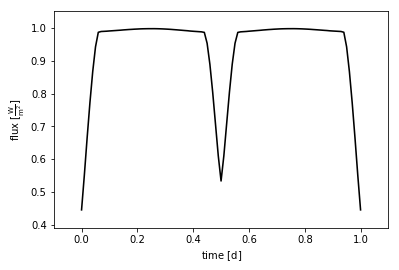

In [40]:
afig, mplfig = b.plot(show=True)

Since these are the only two columns available in the synthetic model, the only other option is to plot in phase instead of time.

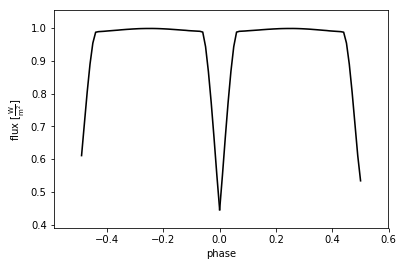

In [41]:
afig, mplfig = b.plot(x='phases', show=True)

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [42]:
print(b.filter(qualifier='period').components)

['primary', 'secondary', 'binary']


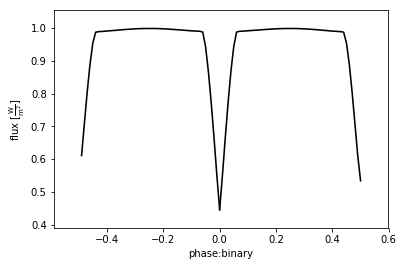

In [43]:
afig, mplfig = b.plot(x='phases:binary', show=True)

Mesh Fields
---------------------

By adding a mesh dataset and setting the columns parameter, light-curve (i.e. passband-dependent) per-element quantities can be exposed and plotted.

Let's add a single mesh at the first time of the light-curve and re-call run_compute

In [44]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [45]:
print(b.get_parameter(qualifier='columns').choices)

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'intensities@lc01', 'normal_intensities@lc01', 'abs_intensities@lc01', 'abs_normal_intensities@lc01', 'boost_factors@lc01', 'ldint@lc01', 'pblum_ext@lc01', 'abs_pblum_ext@lc01', 'ptfarea@lc01']


In [46]:
b.set_value('columns', value=['intensities@lc01', 
                              'abs_intensities@lc01', 
                              'normal_intensities@lc01', 
                              'abs_normal_intensities@lc01', 
                              'pblum_ext@lc01', 
                              'boost_factors@lc01'])

In [47]:
b.run_compute()

Mon, 03 Jun 2019 10:44 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 20 parameters | kinds: mesh, lc>

In [48]:
print(b.get_model().datasets)

['lc01', 'mesh01']


These new columns are stored with the lc's dataset tag, but with the 'mesh' dataset-kind.

In [49]:
print(b.filter(dataset='lc01', kind='mesh', context='model').twigs)

['00.000000@intensities@primary@lc01@phoebe01@latest@mesh@model', '00.000000@normal_intensities@primary@lc01@phoebe01@latest@mesh@model', '00.000000@abs_intensities@primary@lc01@phoebe01@latest@mesh@model', '00.000000@abs_normal_intensities@primary@lc01@phoebe01@latest@mesh@model', '00.000000@boost_factors@primary@lc01@phoebe01@latest@mesh@model', '00.000000@pblum_ext@primary@lc01@phoebe01@latest@mesh@model', '00.000000@intensities@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@normal_intensities@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@abs_intensities@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@abs_normal_intensities@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@boost_factors@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@pblum_ext@secondary@lc01@phoebe01@latest@mesh@model']


Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [mesh dataset](MESH)).

/home/kyle/.local/lib/python2.7/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


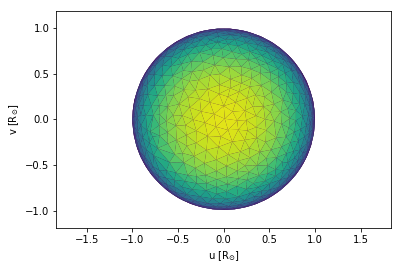

In [50]:
afig, mplfig = b.filter(kind='mesh').plot(fc='intensities', ec='None', show=True)

Now let's look at each of the available fields.

### pblum

For more details, see the tutorial on [Passband Luminosities](pblum)

In [51]:
print(b.get_parameter(qualifier='pblum_ext', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: pblum_ext@primary@latest@model
                       Qualifier: pblum_ext
                     Description: Passband Luminosity of entire star (after pblum scaling)
                           Value: 6.84061886974 W
                  Constrained by: 
                      Constrains: None
                      Related to: None



`pblum_ext` is the *extrinsic* passband luminosity of the entire star/mesh - this is a single value (unlike most of the parameters in the mesh) and does not have per-element values.

### abs_normal_intensities

In [52]:
print(b.get_parameter(qualifier='abs_normal_intensities', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: abs_normal_intensities@primary@latest@model
                       Qualifier: abs_normal_intensities
                     Description: Per-element value of abs_normal_intensities for lc01 dataset
                           Value: [4.28951233e+13 4.28969410e+13 4.28949679e+13 ... 4.18387189e+13
 4.18324864e+13 4.18574089e+13] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



`abs_normal_intensities` are the absolute normal intensities per-element.

### normal_intensities

In [53]:
print(b.get_parameter(qualifier='normal_intensities', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: normal_intensities@primary@latest@model
                       Qualifier: normal_intensities
                     Description: Per-element value of normal_intensities for lc01 dataset
                           Value: [4.41658402e-12 4.41677117e-12 4.41656802e-12 ... 4.30781411e-12
 4.30717239e-12 4.30973847e-12] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



`normal_intensities` are the relative normal intensities per-element.

### abs_intensities

In [54]:
print(b.get_parameter(qualifier='abs_intensities', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: abs_intensities@primary@latest@model
                       Qualifier: abs_intensities
                     Description: Per-element value of abs_intensities for lc01 dataset
                           Value: [4.28943579e+13 4.28961603e+13 4.28942025e+13 ...            nan
            nan            nan] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



`abs_intensities` are the projected absolute intensities (towards the observer) per-element.

### intensities

In [55]:
print(b.get_parameter(qualifier='intensities', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: intensities@primary@latest@model
                       Qualifier: intensities
                     Description: Per-element value of intensities for lc01 dataset
                           Value: [4.41650521e-12 4.41669079e-12 4.41648921e-12 ...            nan
            nan            nan] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



`intensities` are the projected relative intensities (towards the observer) per-element.

### boost_factors

In [56]:
print(b.get_parameter(qualifier='boost_factors', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: boost_factors@primary@latest@model
                       Qualifier: boost_factors
                     Description: Per-element value of boost_factors for lc01 dataset
                           Value: [1. 1. 1. ... 1. 1. 1.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



`boost_factors` are the boosting amplitudes per-element.  See the [boosting tutorial](./beaming_boosting.ipynb) for more details.